# HART ClusterAnalysis Example

*Introduction to the file: this is a dataset produced by an onboard bus survey intended to suppor the study of the rail project's impact on transit. There is an accompanying study, but I did not review it prior to this analysis. *

Going into this analysis, I don't have any particular interest, just trying to assess the value of the dataset to any of my related interests. This could include characterizing people who ride the bus, understanding commute times, understanding which routes are most important, understanding what might make more people ride the bus and move away from driving personal vehicles for transportation

In [1]:
library(ggplot2)

In [2]:
library(tidyverse)

file.info("_bentrevino_files/HART_survey_data.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.2     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
_bentrevino_files/HART_survey_data.csv,25421948,FALSE,644,2018-02-03 12:28:35,2018-02-03 12:28:37,2018-02-26 17:08:56,501,20,bentrevino,staff


## Step 1: Load the file

In [21]:
tb_csv = read.csv("_bentrevino_files/HART_survey_data.csv")

*It's worth noting that this file is 25MB which suggests a large file that might be slow to work with. Will probably want to get it down to be manageable for both performance and management*

## Step 2: Get a sense for Variables

In [22]:
glimpse(tb_csv)

Observations: 26,246
Variables: 157


ERROR: Error in nchar(x): invalid multibyte string, element 46


We found out there are **26K rows ** and **157 variables/columns**
looks like there's an error in the load somewhere. Probably in the formatting of one of the columns. May not be an issue if we filter down.

157 is a lot of variables to work with. Will see what I can get from summary and try to categorize or isolate interesting variables

In [23]:
summary(tb_csv)

  ETC_ID_FINAL       ETC.ID             DATE           ROUTE      
 Min.   :    1   Min.   :   1   2012-04-26:  978   1      : 2033  
 1st Qu.: 6562   1st Qu.:1393   2012-05-14:  862   2      : 1952  
 Median :13124   Median :2144   2012-05-03:  848   A      : 1562  
 Mean   :13124   Mean   :3516   2012-04-24:  808   3      : 1511  
 3rd Qu.:19686   3rd Qu.:5553   2012-04-16:  789   40     : 1288  
 Max.   :26251   Max.   :9999   2012-05-08:  755   13     : 1152  
                                (Other)   :21206   (Other):16748  
 Direction_Code Direction_Text VISITOR.2.HAWAII_Code VISITOR.2.HAWAII_Text
 E:13468        East:13468     Min.   :1.000         No :24691            
 W:12778        West:12778     1st Qu.:2.000         Yes: 1555            
                               Median :2.000                              
                               Mean   :1.941                              
                               3rd Qu.:2.000                              
              

## Step 3: Notes for Clustering
- Pick two dimensions
- plot two dimensions in scatter
- calculating a distance matrix for those two dimensions using dist
- then can calcualte a cluster matrix using hclust
- cluster assignments using cuttree

https://moderndata.plot.ly/create-colorful-graphs-in-r-with-rcolorbrewer-and-plotly/

In [50]:
tb = filter(tb_csv, VISITOR.2.HAWAII_Text == "No")
tb = select(tb, HOME_LON, HOME_LAT, HOME_ZIP_GEOCODED)
tb = sample_n(tb,3000)

#tb = select(tb, INCOME_Code, INCOME_Text)
count(tb)

n
3000


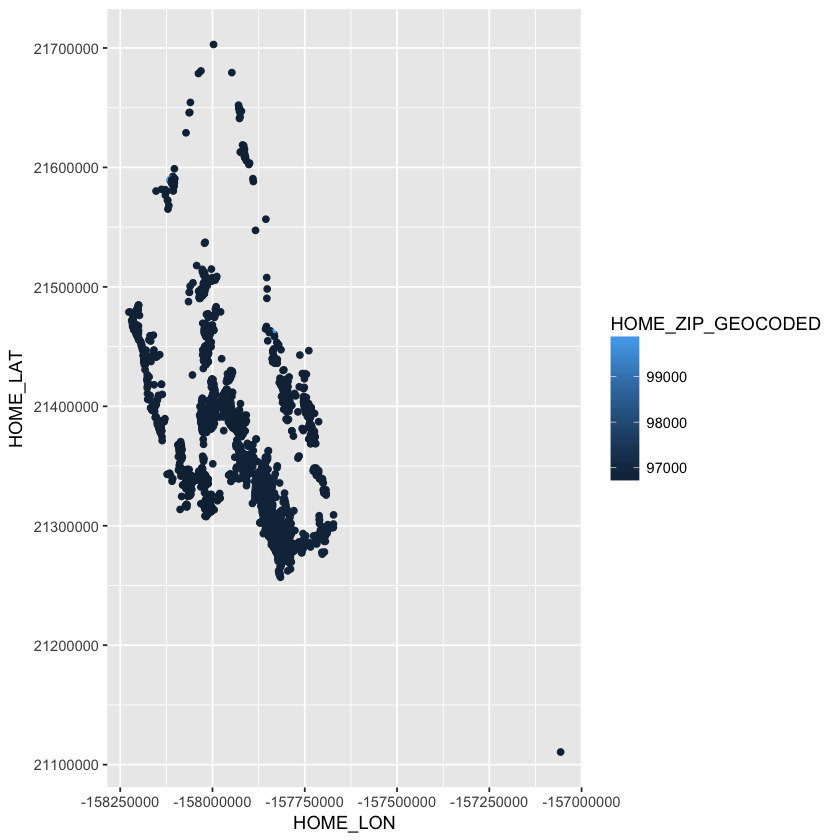

In [51]:
ggplot(tb, aes(x=HOME_LON, y=HOME_LAT, color=HOME_ZIP_GEOCODED)) + geom_point()

n
2997


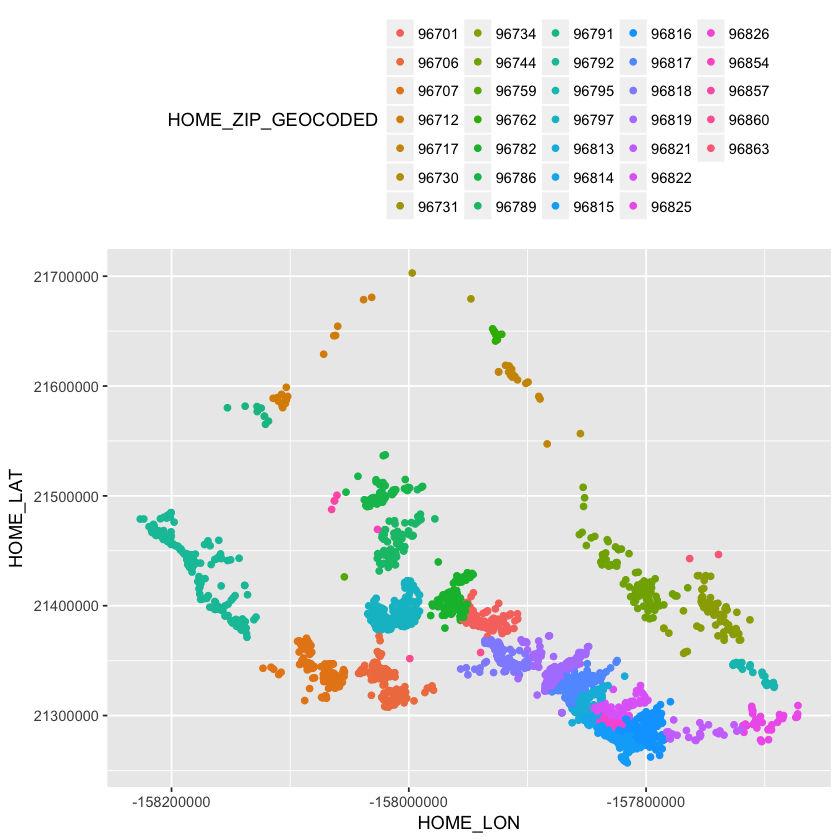

In [77]:
### Need to filter out weird values
# LONGITUDES OUT OF RANGE -157670166 > ok > -158228783 
# LATITUDES OUT OF RANGE  21702896 > ok > 21256894 
# ZIP CODES OUT OF RANGE 96817.25 ok > 96701  

#quantile(tb$HOME_LON)
#quantile(tb$HOME_LAT)
#quantile(tb$HOME_ZIP_GEOCODED)

tb = filter(tb, HOME_ZIP_GEOCODED < 99999)
tb = filter(tb, HOME_LON <= -157670166)
tb$HOME_ZIP_GEOCODED = as.factor(tb$HOME_ZIP_GEOCODED)

#tb = filter(tb, HOME_LON > -157500000)

#-157500000
#-159573791
count(tb)
ggplot(tb, aes(x=HOME_LON, y=HOME_LAT, color=HOME_ZIP_GEOCODED)) + geom_point() + theme(legend.position="top")

In [60]:
tb_clust = select(tb, HOME_LON, HOME_LAT )
tb_means = kmeans(tb_clust, 5)

tb_means
tb_means$cluster
tb_clust

K-means clustering with 5 clusters of sizes 901, 191, 689, 1025, 191

Cluster means:
    HOME_LON HOME_LAT
1 -157870678 21343737
2 -158010643 21523079
3 -158012621 21372861
4 -157808851 21299281
5 -158180147 21437069

Clustering vector:
   [1] 4 1 4 3 1 1 1 4 4 3 1 4 1 1 1 4 4 4 5 3 4 3 4 3 4 3 5 4 5 4 3 5 3 1 4 1 4
  [38] 1 1 1 4 3 1 3 3 4 1 5 5 3 1 1 2 3 3 4 1 4 1 3 4 1 4 3 2 4 4 3 1 4 3 3 1 1
  [75] 4 1 4 4 3 4 3 4 1 1 1 4 1 4 4 4 4 4 4 1 2 1 3 4 1 3 3 4 4 3 3 3 4 1 4 1 1
 [112] 1 1 3 3 3 4 4 3 1 3 1 5 4 4 3 5 4 3 4 3 5 5 5 4 1 3 1 4 4 4 4 3 1 3 5 3 3
 [149] 2 4 4 1 1 4 3 3 1 1 4 3 3 3 1 5 3 3 2 1 4 1 3 4 1 1 1 3 3 1 3 3 4 1 1 5 4
 [186] 3 4 1 3 4 1 4 3 1 3 5 3 4 1 5 3 3 3 4 1 3 4 3 1 1 1 4 1 4 4 4 1 2 4 3 2 2
 [223] 4 3 4 4 3 3 1 4 3 1 3 3 1 1 4 4 3 3 3 4 4 1 1 1 3 5 4 2 4 4 5 3 3 1 4 5 3
 [260] 1 2 1 3 4 3 4 3 3 4 4 5 3 4 1 4 5 4 1 3 5 5 1 2 4 1 2 4 1 4 2 4 1 3 3 1 4
 [297] 2 4 1 1 3 1 4 4 4 3 4 1 1 3 3 4 3 3 1 3 1 3 4 3 4 4 3 3 3 4 3 3 4 4 1 1 1
 [334] 2 3 4 3 1 1 1 2 4 1 1 3 5 4

[1] 4 1 4 3 1 1 1 4 4 3 1 4 1 1 1 4 4 4 5 3 4 3 4 3 4 3 5 4 5 4 3 5 3 1 4 1 4
  [38] 1 1 1 4 3 1 3 3 4 1 5 5 3 1 1 2 3 3 4 1 4 1 3 4 1 4 3 2 4 4 3 1 4 3 3 1 1
  [75] 4 1 4 4 3 4 3 4 1 1 1 4 1 4 4 4 4 4 4 1 2 1 3 4 1 3 3 4 4 3 3 3 4 1 4 1 1
 [112] 1 1 3 3 3 4 4 3 1 3 1 5 4 4 3 5 4 3 4 3 5 5 5 4 1 3 1 4 4 4 4 3 1 3 5 3 3
 [149] 2 4 4 1 1 4 3 3 1 1 4 3 3 3 1 5 3 3 2 1 4 1 3 4 1 1 1 3 3 1 3 3 4 1 1 5 4
 [186] 3 4 1 3 4 1 4 3 1 3 5 3 4 1 5 3 3 3 4 1 3 4 3 1 1 1 4 1 4 4 4 1 2 4 3 2 2
 [223] 4 3 4 4 3 3 1 4 3 1 3 3 1 1 4 4 3 3 3 4 4 1 1 1 3 5 4 2 4 4 5 3 3 1 4 5 3
 [260] 1 2 1 3 4 3 4 3 3 4 4 5 3 4 1 4 5 4 1 3 5 5 1 2 4 1 2 4 1 4 2 4 1 3 3 1 4
 [297] 2 4 1 1 3 1 4 4 4 3 4 1 1 3 3 4 3 3 1 3 1 3 4 3 4 4 3 3 3 4 3 3 4 4 1 1 1
 [334] 2 3 4 3 1 1 1 2 4 1 1 3 5 4 4 1 3 4 3 3 2 1 3 1 1 3 3 3 3 4 3 1 5 3 1 5 1
 [371] 2 3 2 4 2 4 4 1 4 1 1 3 5 1 4 1 2 4 4 4 3 3 4 2 4 5 4 3 1 4 4 4 3 4 1 3 1
 [408] 4 1 3 1 1 1 1 4 3 3 1 3 4 4 3 4 3 1 4 3 3 3 1 4 4 5 4 4 4 1 4 3 4 3 4 3 4
 [445] 4 1 4 1 5 2 5 4 4 4 1 4 3 3 4 3 1 4 3 1 1 3 1 5 1 1 3 1 4 4 1 4 3 2 4 2 4
 [482] 4 1 3 3 1 3 1 4 3 3 3 3 1 1 3 4 3 2 1 4 5 5 3 4 3 5 4 1 4 4 1 1 4 4 3 3 4
 [519] 1 4 4 3 4 4 5 1 3 4 3 4 4 4 4 4 4 1 3 1 3 1 4 4 5 4 4 1 4 1 4 4 3 3 2 4 4
 [556] 1 5 4 4 1 3 3 4 2 4 1 4 2 1 4 1 2 4 3 5 3 1 2 4 3 5 4 4 2 4 5 4 1 1 1 3 4
 [593] 1 4 1 1 4 1 4 3 1 3 4 3 1 5 4 4 3 1 3 1 4 1 4 4 3 3 3 1 1 1 1 4 4 2 4 1 1
 [630] 3 1 1 4 3 4 3 3 1 3 1 1 3 3 5 4 4 3 1 5 4 1 3 4 3 1 1 1 4 5 1 4 3 1 3 3 5
 [667] 4 1 1 4 4 4 4 3 4 2 3 1 4 3 4 4 3 5 1 4 4 5 1 3 3 4 1 3 3 3 1 5 4 1 3 4 1
 [704] 1 5 5 4 4 3 4 1 5 4 3 5 1 1 4 3 4 1 1 1 4 4 4 3 4 2 1 4 4 4 4 3 1 3 1 4 3
 [741] 1 5 3 2 3 3 4 3 4 3 5 3 1 1 3 1 3 3 3 1 4 1 4 1 4 5 4 4 3 4 1 1 4 3 3 3 1
 [778] 4 4 3 1 4 3 3 3 4 3 1 3 2 2 1 3 1 1 5 4 1 4 4 4 1 3 4 4 4 1 4 3 3 4 1 4 4
 [815] 3 1 4 3 2 3 1 4 3 4 4 1 3 1 3 1 4 3 1 3 1 4 3 4 3 4 5 2 3 4 1 4 2 2 2 5 1
 [852] 4 5 1 1 4 3 2 3 3 1 3 4 3 4 1 1 1 1 3 4 1 4 1 2 4 1 4 2 4 2 3 4 5 3 3 3 3
 [889] 4 1 1 4 1 1 4 2 4 3 4 4 1 1 1 4 3 3 1 3 4 4 4 1 4 4 4 3 1 1 3 4 4 1 1 1 4
 [926] 4 1 4 3 4 4 2 3 4 3 1 4 3 4 3 4 3 3 4 3 1 1 4 4 3 2 4 4 4 1 3 3 3 4 1 1 1
 [963] 1 3 4 5 1 2 1 3 3 4 1 1 3 4 4 1 5 4 4 5 3 1 4 4 4 3 4 4 1 4 1 3 4 5 1 4 5
[1000] 4 3 3 3 4 4 4 3 1 2 4 1 4 1 1 1 1 3 3 1 1 1 1 1 3 1 3 1 2 3 1 1 4 1 4 1 3
[1037] 4 1 1 4 1 1 4 1 1 2 5 5 1 4 1 4 1 1 4 2 1 4 5 4 1 4 5 1 4 4 4 2 4 1 4 1 1
[1074] 4 3 4 4 1 4 4 1 4 4 2 1 4 1 4 1 3 3 4 3 1 1 1 1 4 4 4 4 5 3 2 3 1 1 1 4 1
[1111] 1 3 3 1 1 4 2 3 1 4 1 3 4 4 4 3 4 4 1 1 4 3 5 3 4 3 4 5 5 3 4 3 4 1 1 1 4
[1148] 2 4 1 1 4 3 5 1 1 4 1 3 2 4 1 2 4 3 2 1 3 1 1 3 1 4 2 4 1 1 4 1 2 5 4 5 1
[1185] 4 1 4 3 3 1 1 3 4 4 4 4 4 5 3 4 5 3 1 4 4 3 2 1 4 4 1 5 1 1 2 4 5 3 1 1 2
[1222] 3 4 1 4 4 1 4 1 4 4 3 4 1 3 1 4 1 4 1 3 1 3 3 1 1 1 3 2 1 4 4 1 4 3 4 3 1
[1259] 3 1 1 5 3 1 4 1 1 4 5 5 4 4 3 3 4 3 3 1 3 1 4 4 3 4 3 2 4 1 2 4 3 3 1 3 1
[1296] 1 3 1 2 1 4 4 3 3 3 1 1 1 4 2 1 1 3 4 4 5 1 4 1 3 1 5 1 4 3 4 4 4 3 1 2 4
[1333] 4 4 5 4 1 1 5 4 1 4 4 4 1 1 3 3 1 1 4 1 4 2 2 1 1 4 2 1 1 4 4 3 2 4 1 1 3
[1370] 4 5 1 5 4 4 4 4 3 1 2 4 5 3 1 2 4 3 1 4 1 4 5 1 4 3 1 2 5 1 5 4 4 3 3 1 4
[1407] 4 4 3 1 3 1 4 4 3 1 4 1 4 1 3 2 1 4 4 3 5 1 4 5 4 1 4 4 2 4 1 4 3 4 1 1 4
[1444] 4 4 1 4 4 5 3 2 1 4 5 3 1 4 3 1 4 1 4 4 4 3 4 4 4 4 5 1 1 1 2 4 1 3 1 3 4
[1481] 2 1 4 1 5 3 1 4 4 3 1 3 4 1 3 1 1 3 1 5 1 4 3 1 5 4 3 3 3 1 2 4 1 4 2 1 4
[1518] 3 2 3 4 4 5 4 1 4 4 1 4 4 1 1 1 3 1 4 3 1 1 1 4 3 1 1 2 3 1 4 5 4 3 2 4 3
[1555] 1 1 3 4 3 1 4 4 1 4 1 1 1 3 3 4 3 1 3 1 1 1 1 1 4 4 3 1 4 3 1 1 4 4 3 2 4
[1592] 1 1 4 2 4 4 3 3 2 1 4 1 4 4 1 2 4 4 4 1 3 4 4 5 1 4 5 1 4 1 1 2 2 4 4 5 2
[1629] 4 4 1 4 2 4 2 1 3 2 3 3 4 4 4 3 2 4 3 2 3 5 1 5 5 3 4 4 4 3 3 3 1 2 3 3 3
[1666] 4 4 4 4 1 4 1 4 1 1 3 4 4 5 4 3 4 4 1 4 2 1 3 4 4 4 4 2 2 4 4 4 4 1 1 2 3
[1703] 5 2 3 4 1 4 1 4 4 4 1 4 3 2 3 4 4 3 4 4 3 4 4 1 2 4 1 1 1 4 5 3 4 3 4 1 3
[1740] 4 1 1 4 1 4 1 1 3 2 3 5 1 4 4 3 3 2 3 1 4 4 4 4 1 5 2 4 1 1 4 4 5 1 3 1 4
[1777] 4 4 1 3 4 1 4 2 3 3 3 4 3 4 1 4 1 4 2 3 4 5 4 4 1 1 1 1 4 4 3 3 4 4 2 4 2
[1814] 4 1 4 4 3 5 1 4 4 3 2 1 2 1

HOME_LON,HOME_LAT
-157824148,21287531
-157861128,21312488
-157787310,21281108
-158083520,21355700
-157883578,21338490
-157912394,21346661
-157879833,21341265
-157822600,21287500
-157796893,21291835
-157955230,21397530


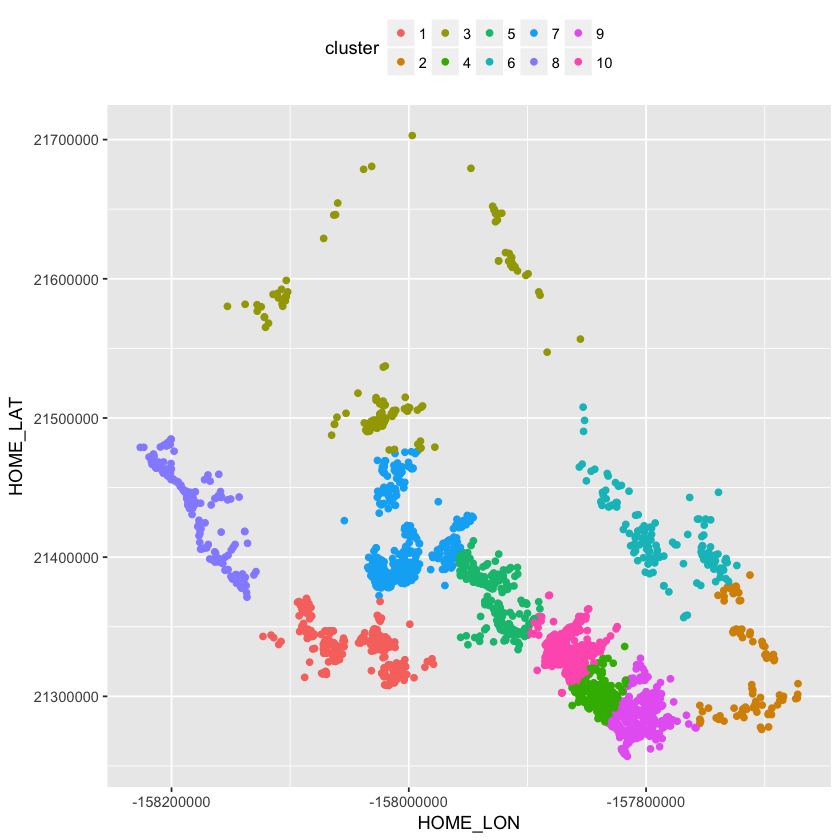

In [95]:
tb_clust = select(tb, HOME_LON, HOME_LAT )
#tb_means = kmeans(tb_clust, 33) #33 zipcodes for comparison
tb_means = kmeans(tb_clust, 10)


tb_clust = mutate(tb_clust, cluster = as.factor(tb_means$cluster))
ggplot(tb_clust, aes(x=HOME_LON, y=HOME_LAT, color=cluster)) + geom_point() + theme(legend.position="top") #+ scale_colour_brewer(palette = "Paired")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   61436  140142  153416  218661  582388 

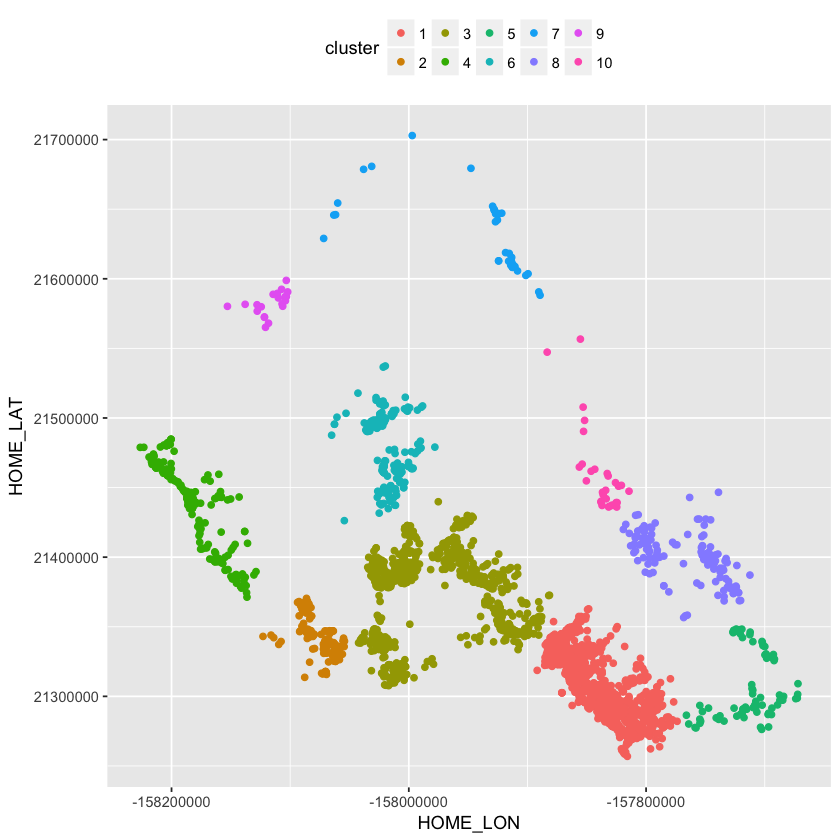

In [94]:
tb_hier = select(tb, HOME_LON, HOME_LAT)
dist_lon_lat = dist(tb_hier)
summary(dist_lon_lat)
hart_hier = hclust(dist_lon_lat)
tb_hclust = cutree(hart_hier, 10)

tb_hier = mutate(tb_hier, cluster = as.factor(tb_hclust))
ggplot(tb_hier, aes(x=HOME_LON, y=HOME_LAT, color=cluster)) + geom_point() + theme(legend.position="top")

#dist_lon_lat

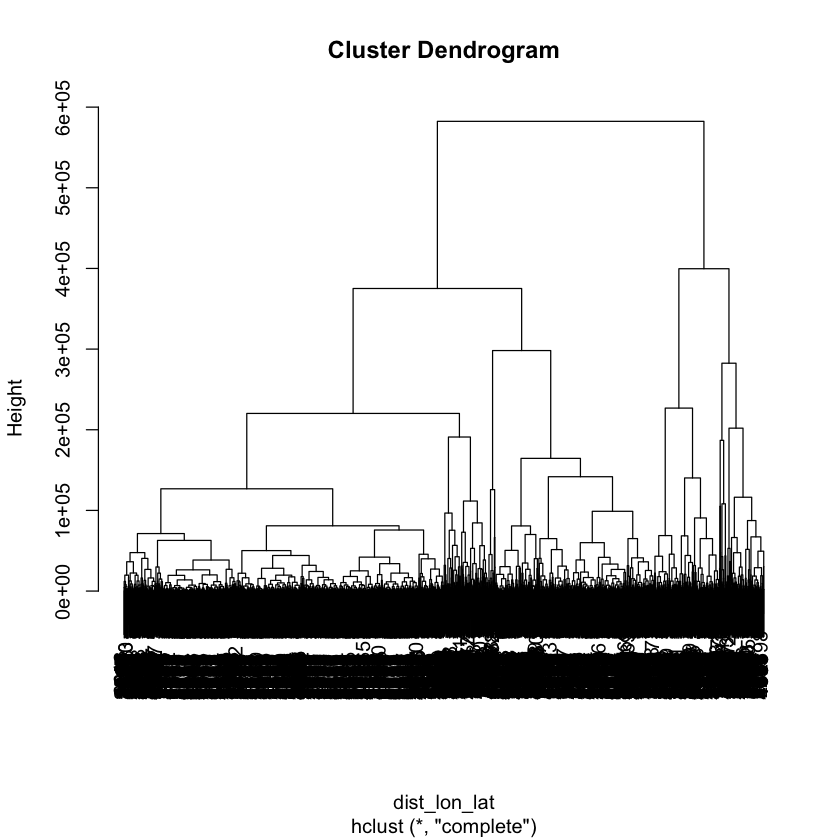

In [96]:
plot(hart_hier)